# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

1. In this project we will try to conduct a preliminary analysis of some of the **most populated cities** across different continents and check how the population **responds to the restaurant industries**. 

2. This can potentially help the stakeholders in the industry to understand where to focus **more energy for advertising** and which cities are **more conducive** for them. 

3. We will try to use **data visualization** techniques to understand these habits and try to provide a **descriptive analysis** that best explains the current 

## Data <a name="data"></a>

The project requires location data from multiple cities across all continents. 
The selected cities for this project are as follows:
1. Asia: *Tokyo*
2. Africa: *Lagos*
3. Europe: *Istanbul*
4. Australia: *Sydney*
5. North America: *New York*
6. South America: *Sao Paulo*

The project also requires venue data from the **Foursquare API**. The data will be processed so as to gather venues relevant to the restaurant industries into respective dataframes. Furthermore population data for each of these cities will be required so as to understand how that population responds to restaurants within the respective cities.

Before we get the data and start exploring it, let's download the dependencies that we will need.

In [4]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis


import json # library to handle JSON files


import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors


print('Libraries imported.')

Libraries imported.


In [5]:
! pip install geopy
from geopy.geocoders import Nominatim 

#### Define Foursquare Credentials and Version

In [6]:
CLIENT_ID = 'M3DHXPUIETMOMGWXZTAAGMRPYVE1TPQEQ4T23XB1XESBNJBK' # your Foursquare ID
CLIENT_SECRET = 'FSLKC11P00CMUUY0FHPP0EBV2ZZPB4HP2S1TX0DNQLEQQDG2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: M3DHXPUIETMOMGWXZTAAGMRPYVE1TPQEQ4T23XB1XESBNJBK
CLIENT_SECRET:FSLKC11P00CMUUY0FHPP0EBV2ZZPB4HP2S1TX0DNQLEQQDG2


## Methodology <a name="methodology"></a>
**Data cleaning:**
I initially derived latitude and longitude data for the corresponding city via geopy. Then, using the Foursquare API service, I created  a data frame of the top 100 trending venues in a 10 km radius. The data frame contained the name of each venue and the venue category that corresponds to each venue. I was interested in venues corresponding to the restaurant industry. Firstly I duplicated this data frame. The reason behind this is I needed to carry out two separate analyses: (1) An analysis of the restaurant industry with other venue categories representing other industries.  (2) An analysis of competition from within the restaurant industry as well. 

## Analysis <a name="analysis"></a>

#### Use geopy library to get the latitude and longitude values of Tokyo City.

In [7]:
address = 'Tokyo, Japan'

geolocator = Nominatim(user_agent="tyo_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Tokyo City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Tokyo City are 35.6828387, 139.7594549.


In [8]:
tokyo_latitude = 35.6828387
tokyo_longitude = 139.7594549
print('Latitude and longitude values of Tokyo are {}, {}.'.format(tokyo_latitude, 
                                                               tokyo_longitude))

Latitude and longitude values of Tokyo are 35.6828387, 139.7594549.


#### Now, let's get the venues that are in Tokyo within a radius of 10,000 meters.

In [9]:
LIMIT = 100# limit of number of venues returned by Foursquare API
radius = 10000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    tokyo_latitude, 
    tokyo_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=M3DHXPUIETMOMGWXZTAAGMRPYVE1TPQEQ4T23XB1XESBNJBK&client_secret=FSLKC11P00CMUUY0FHPP0EBV2ZZPB4HP2S1TX0DNQLEQQDG2&v=20180605&ll=35.6828387,139.7594549&radius=10000&limit=100'

Send the GET request and examine the resu

In [10]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e9d2fd378a484001bd8e703'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Tokyo',
  'headerFullLocation': 'Tokyo',
  'headerLocationGranularity': 'city',
  'totalResults': 238,
  'suggestedBounds': {'ne': {'lat': 35.77283879000009,
    'lng': 139.87005032570804},
   'sw': {'lat': 35.59283860999991, 'lng': 139.64885947429198}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b05879af964a520ac9b22e3',
       'name': 'Palace Hotel Tokyo (パレスホテル東京)',
       'location': {'address': '丸の内1-1-1',
        'lat': 35.684644,
        'lng': 139.761302,
        'labeledLatLngs': [{'label': 'display',
          'lat': 35.684644,
          'lng': 139.761302

All the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [11]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [12]:
venues = results['response']['groups'][0]['items']
    
nearby_venues_tyo = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_tyo =nearby_venues_tyo.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_tyo['venue.categories'] = nearby_venues_tyo.apply(get_category_type, axis=1)

# clean columns
nearby_venues_tyo.columns = [col.split(".")[-1] for col in nearby_venues_tyo.columns]

nearby_venues_tyo.head()

C:\Users\Parachute\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Palace Hotel Tokyo (パレスホテル東京),Hotel,35.684644,139.761302
1,Kokyo Gaien (皇居外苑),Garden,35.679928,139.758562
2,Aman Tokyo (アマン東京),Hotel,35.685236,139.765401
3,KITTE Garden (屋上庭園 KITTEガーデン),Garden,35.679654,139.765169
4,Maruzen (丸善),Bookstore,35.683472,139.766567


### Preprocessing the Dataframe

In [13]:
nearby_venues_tyo.categories.unique()

array(['Hotel', 'Garden', 'Bookstore', 'Art Museum', 'Donburi Restaurant',
       'Multiplex', 'South Indian Restaurant', 'Coffee Shop',
       'Udon Restaurant', 'Ramen Restaurant', 'Japanese Curry Restaurant',
       'Thai Restaurant', 'Trail', 'Sushi Restaurant', 'Soba Restaurant',
       'Tonkatsu Restaurant', 'Italian Restaurant', 'Sake Bar',
       'German Restaurant', 'Wagashi Place', 'Bed & Breakfast',
       'Sandwich Place', 'Pet Store', 'Yakitori Restaurant',
       'Japanese Restaurant', 'Seafood Restaurant', 'French Restaurant',
       'Electronics Store', 'Shrine', 'Café', 'Chinese Restaurant',
       'BBQ Joint', 'Concert Hall', 'Historic Site', 'Yoshoku Restaurant',
       'Pet Café', 'Nightclub', 'Spa', 'Burger Joint',
       'Monument / Landmark', 'Art Gallery', 'Indian Restaurant',
       'Kaiseki Restaurant', 'Buddhist Temple', 'Unagi Restaurant',
       'Beer Bar', 'Cocktail Bar', 'Roof Deck', 'Park', 'Hostel',
       'Climbing Gym', 'Pizza Place', 'Science Museum'

(1)	For the first part of the initial analysis I grouped all the venue categories that I deemed fit to be included in the restaurant industry. This included categories such as Bar and Café. I then replaced all of these categories in the data frame to a single category called ‘Restaurant Industry’. I also dropped the latitude longitude data as it was not required for this part of the analysis. Using this modified data frame I applied data visualization techniques to make statistical inferences on how much competition the restaurant industry faced within each city

In [14]:
tokyo_venues = nearby_venues_tyo.copy()
tokyo_venues.head()

,name,categories,lat,lng
0,Palace Hotel Tokyo (パレスホテル東京),Hotel,35.684644,139.761302
1,Kokyo Gaien (皇居外苑),Garden,35.679928,139.758562
2,Aman Tokyo (アマン東京),Hotel,35.685236,139.765401
3,KITTE Garden (屋上庭園 KITTEガーデン),Garden,35.679654,139.765169
4,Maruzen (丸善),Bookstore,35.683472,139.766567


In [15]:
tokyo_venues.replace(to_replace =["Donburi Restaurant", "South Indian Restaurant", "Japanese Restaurant", "Dessert Shop", 
                                 "Coffee Shop", "Udon Restaurant", "Ramen Restaurant", "Japanese Curry Restaurant", "Thai Restaurant", 
                                 "Sushi Restaurant", "Soba Restaurant", "Tonkatsu Restaurant", "Italian Restaurant", "Sake Bar", "Wagashi Place", "Bed & Breakfast",  
                                 "Sandwich Place", "Yakitori Restaurant", "French Restaurant", "Café", "Chinese Restaurant", 
                                 "BBQ Joint", "Pet Café", "Burger Joint", "Indian Restaurant", "Kaiseki Restaurant", "Unagi Restaurant", 
                                 "Beer Bar", "Steakhouse", "Cocktail Bar", "Pizza Place", "Bakery", "Seafood Restaurant", 
                                 "Spanish Restaurant", "Yoshoku Restaurant", "German Restaurant"],  
                            value ="Restaurant Industry", inplace = True)
tokyo_venues.head()

,name,categories,lat,lng
0,Palace Hotel Tokyo (パレスホテル東京),Hotel,35.684644,139.761302
1,Kokyo Gaien (皇居外苑),Garden,35.679928,139.758562
2,Aman Tokyo (アマン東京),Hotel,35.685236,139.765401
3,KITTE Garden (屋上庭園 KITTEガーデン),Garden,35.679654,139.765169
4,Maruzen (丸善),Bookstore,35.683472,139.766567


In [16]:
tokyo_venues.drop(columns=['lat', 'lng'], axis = 1, inplace = True)
tokyo_venues.head()

,name,categories
0,Palace Hotel Tokyo (パレスホテル東京),Hotel
1,Kokyo Gaien (皇居外苑),Garden
2,Aman Tokyo (アマン東京),Hotel
3,KITTE Garden (屋上庭園 KITTEガーデン),Garden
4,Maruzen (丸善),Bookstore


In [17]:
tyo_category_count = tokyo_venues.groupby(['categories']).count() 
tyo_category_count.head(10)

,name
categories,
Art Gallery,1
Art Museum,5
Bookstore,1
Botanical Garden,1
Buddhist Temple,1
Climbing Gym,1
Concert Hall,2
Electronics Store,1
Garden,3


In [18]:
tyo_category_count.rename(columns = {'name':'Count'}, inplace = True) 
tyo_category_count.head()

,Count
categories,
Art Gallery,1
Art Museum,5
Bookstore,1
Botanical Garden,1
Buddhist Temple,1


In [19]:
tyo_category_count.reset_index()

,categories,Count
0,Art Gallery,1
1,Art Museum,5
2,Bookstore,1
3,Botanical Garden,1
4,Buddhist Temple,1
5,Climbing Gym,1
6,Concert Hall,2
7,Electronics Store,1
8,Garden,3
9,Historic Site,1


After cleaning the dataframe I checked the overall number of venues categories for Tokyo

In [20]:
tyo_category_count.shape

(24, 1)

We then plot a bar graph to understand the distribution of these venue categories

In [21]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.3


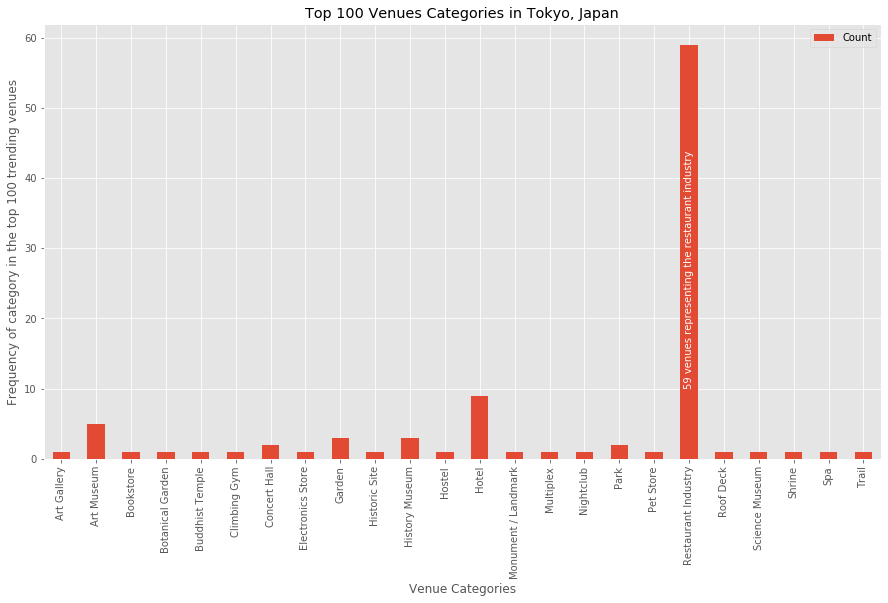

In [22]:
tyo_category_count.plot(kind='bar', figsize=(15, 8), rot=90) # rotate the bars by 90 degrees

plt.xlabel('Venue Categories')
plt.ylabel('Frequency of category in the top 100 trending venues')
plt.title('Top 100 Venues Categories in Tokyo, Japan')
plt.annotate('59 venues representing the restaurant industry', # text to display
             xy=(17.87, 10),                    # start the text at at point (year 2008 , pop 30)
             rotation= 90.0,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                     # want the text to be horizontally 'left' algned.
             color='white'
            )
plt.show()

(2)	For the second part of the initial analysis I dropped all the venue categories that did not belong to the restaurant industry and again dropped the latitude and longitude data. This part of the analysis focused on which trending venue categories corresponding to the restaurant industry were currently popular within the respective cities.   

In [23]:
indexNames = nearby_venues_tyo[(nearby_venues_tyo.categories != 'Donburi Restaurant')
                              & (nearby_venues_tyo.categories != 'South Indian Restaurant')
                              & (nearby_venues_tyo.categories != 'Japanese Restaurant')
                              & (nearby_venues_tyo.categories != 'Dessert Shop')
                              & (nearby_venues_tyo.categories != 'Coffee Shop')
                              & (nearby_venues_tyo.categories != 'Udon Restaurant')
                              & (nearby_venues_tyo.categories != 'Ramen Restaurant')
                              & (nearby_venues_tyo.categories != 'Japanese Curry Restaurant')
                              & (nearby_venues_tyo.categories != 'Thai Restaurant')
                              & (nearby_venues_tyo.categories != 'Sushi Restaurant')
                              & (nearby_venues_tyo.categories != 'Soba Restaurant')
                              & (nearby_venues_tyo.categories !=  'Italian Restaurant')
                              & (nearby_venues_tyo.categories != 'Sake Bar')
                              & (nearby_venues_tyo.categories != 'Wagashi Place')
                              & (nearby_venues_tyo.categories != 'Bed & Breakfast')
                              & (nearby_venues_tyo.categories != 'Sandwich Place')
                              & (nearby_venues_tyo.categories != 'Yakitori Restaurant')
                              & (nearby_venues_tyo.categories != 'French Restaurant')
                              & (nearby_venues_tyo.categories !=  'Café')
                              & (nearby_venues_tyo.categories != 'Chinese Restaurant')
                              & (nearby_venues_tyo.categories != 'BBQ Joint')
                              & (nearby_venues_tyo.categories != 'Pet Café')
                              & (nearby_venues_tyo.categories != 'Burger Joint')
                              & (nearby_venues_tyo.categories != 'Indian Restaurant')
                              & (nearby_venues_tyo.categories != 'Kaiseki Restaurant')
                              & (nearby_venues_tyo.categories != 'Unagi Restaurant')
                              & (nearby_venues_tyo.categories != 'Beer Bar')
                              & (nearby_venues_tyo.categories != 'Steakhouse')
                              &(nearby_venues_tyo.categories != 'Cocktail Bar')
                              &(nearby_venues_tyo.categories != 'Pizza Place')
                              &(nearby_venues_tyo.categories != 'Bakery')
                              &(nearby_venues_tyo.categories != 'Spanish Restaurant')
                              &(nearby_venues_tyo.categories != 'Yoshoku Restaurant')
                              &(nearby_venues_tyo.categories != 'German Restaurant')
                              &(nearby_venues_tyo.categories != 'Seafood Restaurant')
                              ].index
nearby_venues_tyo.drop(indexNames , inplace=True)
nearby_venues_tyo.head(15)

,name,categories,lat,lng
7,Tsujihan (つじ半),Donburi Restaurant,35.680763,139.771563
9,Erick South (エリックサウス),South Indian Restaurant,35.679474,139.770860
11,Kanda Brazil (神田伯剌西爾),Coffee Shop,35.695827,139.759630
12,Maruka (丸香),Udon Restaurant,35.696693,139.760121
13,Ramen Jiro (ラーメン二郎 神田神保町店),Ramen Restaurant,35.695198,139.760765
14,Bondy (欧風カレー ボンディ),Japanese Curry Restaurant,35.695544,139.757356
15,Tokyo Khao Man Gai (東京カオマンガイ),Thai Restaurant,35.690788,139.770253
17,Ginza Kyubey (銀座 久兵衛),Sushi Restaurant,35.668371,139.761324
18,Rice Curry Manten (ライスカレーまんてん),Japanese Curry Restaurant,35.698213,139.757428
19,Kanda Matsuya (神田まつや),Soba Restaurant,35.696122,139.768778


In [24]:
nearby_venues_tyo.drop(columns=['lat', 'lng'], axis = 1, inplace = True)

In [25]:
nearby_venues_tyo.shape

(56, 2)

In [26]:
tyo_name_count = nearby_venues_tyo.groupby(['categories']).count() 
tyo_name_count.head()

,name
categories,
BBQ Joint,3
Bakery,1
Bed & Breakfast,1
Beer Bar,1
Burger Joint,2


After cleaning the dataframe I plotted a horizontal bar graph to depict the distribution of venues corresponding to the restaurant industry within Tokyo

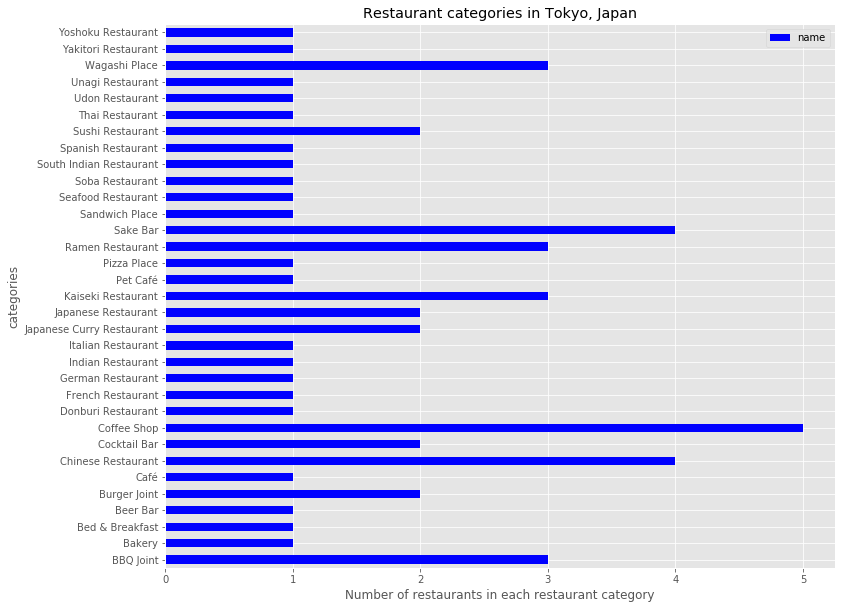

In [27]:
tyo_name_count.plot(kind='barh', figsize=(12, 10), color='blue')
plt.xlabel('Number of restaurants in each restaurant category')
plt.title('Restaurant categories in Tokyo, Japan')
plt.show()

This process of creating and cleaning the data frames and applying data visualization techniques to understand the impact of the restaurant industry on the corresponding city was repeated for all six aforementioned cities

#### Lagos Data Analysis (Africa)

In [28]:
address = 'Lagos, Nigeria'

geolocator = Nominatim(user_agent="lg_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Lagos City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Lagos City are 6.4550575, 3.3941795.


In [29]:
lagos_latitude = 6.4550575
lagos_longitude = 3.3941795
print('Latitude and longitude values of Lagos are {}, {}.'.format(lagos_latitude, 
                                                               lagos_longitude))

Latitude and longitude values of Lagos are 6.4550575, 3.3941795.


In [30]:
LIMIT = 100# limit of number of venues returned by Foursquare API
radius = 10000 # define radius
# create URL
url1 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lagos_latitude, 
    lagos_longitude, 
    radius, 
    LIMIT)
url1 # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=M3DHXPUIETMOMGWXZTAAGMRPYVE1TPQEQ4T23XB1XESBNJBK&client_secret=FSLKC11P00CMUUY0FHPP0EBV2ZZPB4HP2S1TX0DNQLEQQDG2&v=20180605&ll=6.4550575,3.3941795&radius=10000&limit=100'

In [31]:
results = requests.get(url1).json()
results

{'meta': {'code': 200, 'requestId': '5e9d2eeb963d29002452bc16'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Lagos',
  'headerFullLocation': 'Lagos',
  'headerLocationGranularity': 'city',
  'totalResults': 128,
  'suggestedBounds': {'ne': {'lat': 6.54505759000009,
    'lng': 3.484584687140228},
   'sw': {'lat': 6.36505740999991, 'lng': 3.3037743128597716}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4fa3a928e4b01208f9529e8e',
       'name': 'Freedom Park',
       'location': {'address': 'Broad Street',
        'lat': 6.449065067109614,
        'lng': 3.396536383249523,
        'labeledLatLngs': [{'label': 'display',
          'lat': 6.449065067109614,
          'lng': 3.3

In [32]:
venues1 = results['response']['groups'][0]['items']
    
nearby_venues_lag = json_normalize(venues1) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_lag =nearby_venues_lag.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_lag['venue.categories'] = nearby_venues_lag.apply(get_category_type, axis=1)

# clean columns
nearby_venues_lag.columns = [col.split(".")[-1] for col in nearby_venues_lag.columns]

nearby_venues_lag.head(15)

C:\Users\Parachute\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Freedom Park,Park,6.449065,3.396536
1,SpicyInc Studio,Photography Studio,6.451069,3.398125
2,Muson Centre,Convention Center,6.443333,3.401084
3,Hans & René,Ice Cream Shop,6.436522,3.416507
4,Sakura Japanese Restaurant,Japanese Restaurant,6.427309,3.412219
5,Bogobiri,Art Gallery,6.443432,3.424311
6,Spice Route,Asian Restaurant,6.429557,3.419823
7,Casper & Gambini's,Modern European Restaurant,6.429813,3.418668
8,R.S.V.P,Restaurant,6.428207,3.421662
9,Radisson Blu Anchorage Hotel,Hotel,6.436812,3.417204


In [33]:
nearby_venues_lag.categories.unique()

array(['Park', 'Photography Studio', 'Convention Center',
       'Ice Cream Shop', 'Japanese Restaurant', 'Art Gallery',
       'Asian Restaurant', 'Modern European Restaurant', 'Restaurant',
       'Hotel', 'Breakfast Spot', 'Nightclub', 'African Restaurant',
       'Café', 'Baseball Stadium', 'Pizza Place', 'Italian Restaurant',
       'Market', 'Karaoke Bar', 'Soccer Field', 'Athletics & Sports',
       'Lounge', 'Multiplex', 'Cocktail Bar', 'Music Venue',
       'Gym / Fitness Center', 'Golf Course', 'Mexican Restaurant',
       'Diner', 'Burger Joint', 'Bar', 'Mediterranean Restaurant',
       'Seafood Restaurant', 'Neighborhood', 'Grocery Store',
       'Brazilian Restaurant', 'Shopping Mall', 'Movie Theater', 'Plaza',
       'Sports Bar', 'Bagel Shop', 'Theme Restaurant',
       'Indian Restaurant', 'Department Store', 'Spa',
       'Frozen Yogurt Shop', 'Food & Drink Shop', 'Clothing Store',
       'Playground', 'IT Services', 'Chinese Restaurant',
       'Fast Food Restaurant'

In [34]:
lagos_venues = nearby_venues_lag.copy()
lagos_venues.head()

,name,categories,lat,lng
0,Freedom Park,Park,6.449065,3.396536
1,SpicyInc Studio,Photography Studio,6.451069,3.398125
2,Muson Centre,Convention Center,6.443333,3.401084
3,Hans & René,Ice Cream Shop,6.436522,3.416507
4,Sakura Japanese Restaurant,Japanese Restaurant,6.427309,3.412219


In [35]:
lagos_venues.replace(to_replace =["Ice Cream Shop", "Japanese Restaurant", "Asian Restaurant", "Modern European Restaurant", 
                                 "Restaurant", "Breakfast Spot", "African Restaurant", "Café", "Pizza Place", 
                                 "Italian Restaurant", "Cocktail Bar", "Mexican Restaurant", "Diner", "Burger Joint", "Bar", 
                                  "Mediterranean Restaurant", "Seafood Restaurant", "Brazilian Restaurant", "American Restaurant", "Sports Bar", "Bagel Shop", 
                                 "Theme Restaurant", "Pet Café", "Burger Joint", "Indian Restaurant", "Kaiseki Restaurant", "Unagi Restaurant", 
                                 "Beer Bar", "Indian Restaurant", "Frozen Yogurt Shop", "Fast Food Restaurant", "Chinese Restaurant", "Cupcake Shop"],  
                            value ="Restaurant Industry", inplace = True)
lagos_venues.head(15)

,name,categories,lat,lng
0,Freedom Park,Park,6.449065,3.396536
1,SpicyInc Studio,Photography Studio,6.451069,3.398125
2,Muson Centre,Convention Center,6.443333,3.401084
3,Hans & René,Restaurant Industry,6.436522,3.416507
4,Sakura Japanese Restaurant,Restaurant Industry,6.427309,3.412219
5,Bogobiri,Art Gallery,6.443432,3.424311
6,Spice Route,Restaurant Industry,6.429557,3.419823
7,Casper & Gambini's,Restaurant Industry,6.429813,3.418668
8,R.S.V.P,Restaurant Industry,6.428207,3.421662
9,Radisson Blu Anchorage Hotel,Hotel,6.436812,3.417204


In [36]:
lagos_venues.drop(columns=['lat', 'lng'], axis = 1, inplace = True)
lag_category_count = lagos_venues.groupby(['categories']).count() 
lag_category_count.rename(columns = {'name':'Count'}, inplace = True) 
lag_category_count.reset_index()
lag_category_count.head()

,Count
categories,
Art Gallery,2
Athletics & Sports,1
Baseball Stadium,1
Clothing Store,1
Convention Center,1


In [37]:
lag_category_count.shape

(29, 1)

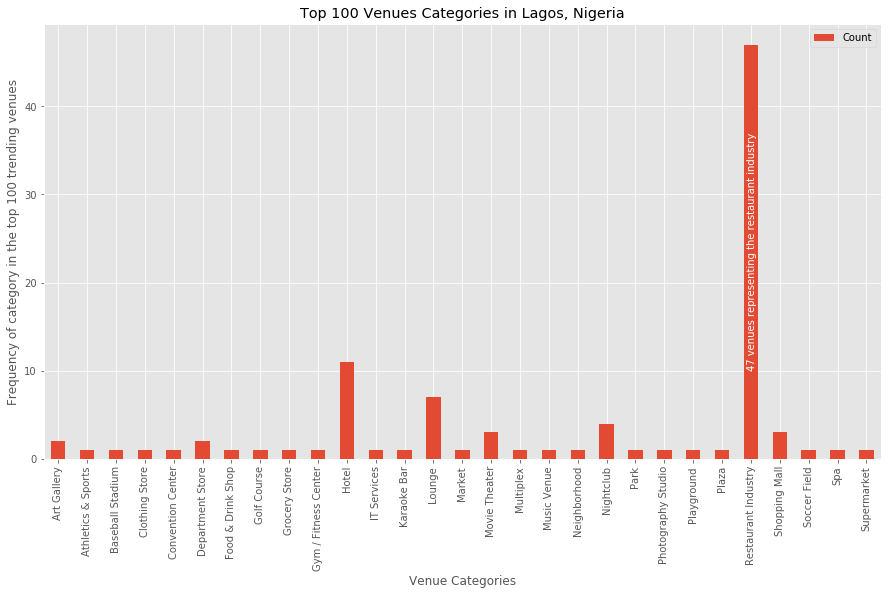

In [38]:
lag_category_count.plot(kind='bar', figsize=(15, 8), rot=90) # rotate the bars by 90 degrees

plt.xlabel('Venue Categories')
plt.ylabel('Frequency of category in the top 100 trending venues')
plt.title('Top 100 Venues Categories in Lagos, Nigeria')
plt.annotate('47 venues representing the restaurant industry', # text to display
             xy=(23.86, 10),                    # start the text at at point (year 2008 , pop 30)
             rotation= 90.0,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                     # want the text to be horizontally 'left' algned.
             color='white'
            )
plt.show()

In [39]:
indexNames1 = nearby_venues_lag[(nearby_venues_lag.categories != 'Ice Cream Shop')
                               & (nearby_venues_lag.categories != 'Japanese Restaurant')
                              & (nearby_venues_lag.categories != 'Asian Restaurant')
                              & (nearby_venues_lag.categories != 'Modern European Restaurant')
                              & (nearby_venues_lag.categories != 'Restaurant')
                              & (nearby_venues_lag.categories != 'Breakfast Spot')
                              & (nearby_venues_lag.categories != 'African Restaurant')
                              & (nearby_venues_lag.categories != 'Café')
                              & (nearby_venues_lag.categories != 'Pizza Place')
                              & (nearby_venues_lag.categories != 'Italian Restaurant')
                              & (nearby_venues_lag.categories != 'Cocktail Bar')
                              & (nearby_venues_lag.categories !=  'Mexican Restaurant')
                              & (nearby_venues_lag.categories != 'Diner')
                              & (nearby_venues_lag.categories != 'Burger Joint')
                              & (nearby_venues_lag.categories != 'Bar')
                              & (nearby_venues_lag.categories != 'Mediterranean Restaurant')
                              & (nearby_venues_lag.categories != 'Seafood Restaurant')
                              & (nearby_venues_lag.categories != 'Brazilian Restaurant')
                              & (nearby_venues_lag.categories !=  'American Restaurant')
                              & (nearby_venues_lag.categories != 'Sports Bar')
                              & (nearby_venues_lag.categories != 'Bagel Shop')
                              & (nearby_venues_lag.categories != 'Theme Restaurant')
                              & (nearby_venues_lag.categories != 'Indian Restaurant')
                              & (nearby_venues_lag.categories != 'Frozen Yogurt Shop')
                              & (nearby_venues_lag.categories != 'Fast Food Restaurant')
                              & (nearby_venues_lag.categories != 'Chinese Restaurant')
                              &(nearby_venues_lag.categories != 'Cupcake Shop')
                               ].index
nearby_venues_lag.drop(indexNames1 , inplace=True)
nearby_venues_lag.head(15)

,name,categories,lat,lng
3,Hans & René,Ice Cream Shop,6.436522,3.416507
4,Sakura Japanese Restaurant,Japanese Restaurant,6.427309,3.412219
6,Spice Route,Asian Restaurant,6.429557,3.419823
7,Casper & Gambini's,Modern European Restaurant,6.429813,3.418668
8,R.S.V.P,Restaurant,6.428207,3.421662
10,Crust & Cream,Breakfast Spot,6.432539,3.416690
12,Yello Chilli,African Restaurant,6.424972,3.415211
13,Cafe Neo at fourteen36,Café,6.431200,3.426356
15,Pizze-riah Wood-fired pizza,Pizza Place,6.432408,3.416935
17,La Veranda,Italian Restaurant,6.426365,3.415489


In [40]:
nearby_venues_lag.shape

(47, 4)

In [41]:
nearby_venues_lag.drop(columns=['lat', 'lng'], axis = 1, inplace = True)
lag_name_count = nearby_venues_lag.groupby(['categories']).count() 
lag_name_count.head()

,name
categories,
African Restaurant,8
Asian Restaurant,1
Bagel Shop,1
Bar,2
Brazilian Restaurant,1


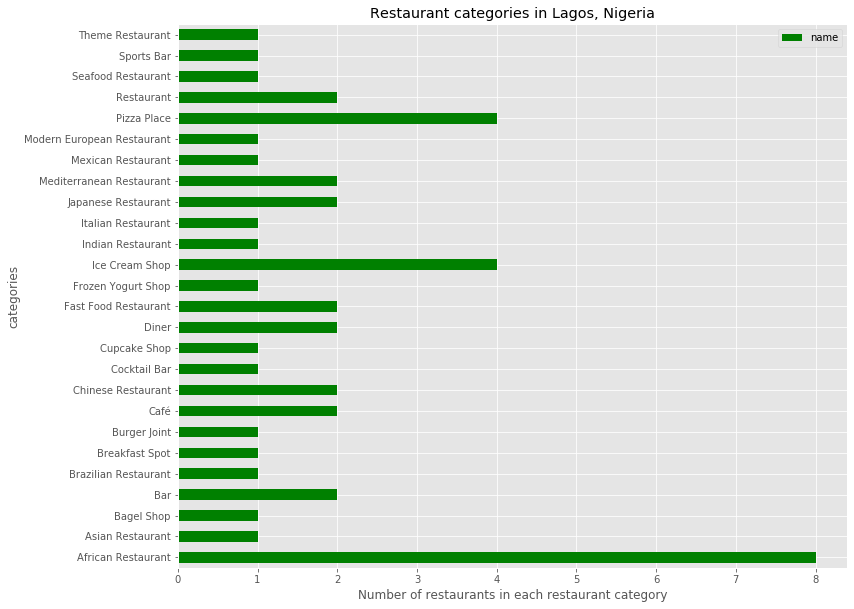

In [42]:
lag_name_count.plot(kind='barh', figsize=(12, 10), color='green')
plt.xlabel('Number of restaurants in each restaurant category')
plt.title('Restaurant categories in Lagos, Nigeria')
plt.show()

### Istanbul Data Analysis (Europe)

In [43]:
address = 'Istanbul, Turkey'

geolocator = Nominatim(user_agent="lt_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Istanbul City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Istanbul City are 41.0766019, 29.052495.


In [44]:
istanbul_latitude = 41.0766019
istanbul_longitude = 29.052495
print('Latitude and longitude values of Istanbul are {}, {}.'.format(istanbul_latitude, 
                                                              istanbul_longitude))

Latitude and longitude values of Istanbul are 41.0766019, 29.052495.


In [45]:
LIMIT = 100# limit of number of venues returned by Foursquare API
radius = 10000 # define radius
# create URL
url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    istanbul_latitude, 
    istanbul_longitude, 
    radius, 
    LIMIT)
url2 # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=M3DHXPUIETMOMGWXZTAAGMRPYVE1TPQEQ4T23XB1XESBNJBK&client_secret=FSLKC11P00CMUUY0FHPP0EBV2ZZPB4HP2S1TX0DNQLEQQDG2&v=20180605&ll=41.0766019,29.052495&radius=10000&limit=100'

In [46]:
results = requests.get(url2).json()
results

{'meta': {'code': 200, 'requestId': '5e9d3012c546f3001b95ea79'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'With specials', 'key': 'specials'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 218,
  'suggestedBounds': {'ne': {'lat': 41.16660199000009,
    'lng': 29.171662235183973},
   'sw': {'lat': 40.98660180999991, 'lng': 28.933327764816028}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d7f764d564b8cfa42840565',
       'name': 'Kandilli Sahili',
       'location': {'address': 'Kandilli',
        'crossStreet': 'Kandilli-Göksu Cd.',
        'lat': 41.07437821689484,
        'lng': 2

In [47]:
venues2 = results['response']['groups'][0]['items']
    
nearby_venues_ist = json_normalize(venues2) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_ist =nearby_venues_ist.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_ist['venue.categories'] = nearby_venues_ist.apply(get_category_type, axis=1)

# clean columns
nearby_venues_ist.columns = [col.split(".")[-1] for col in nearby_venues_ist.columns]

nearby_venues_ist.head()

C:\Users\Parachute\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Kandilli Sahili,Beach,41.074378,29.059562
1,Adile Sultan Sarayı,Historic Site,41.072159,29.058089
2,Mithat Alam Film Merkezi,Movie Theater,41.082960,29.050284
3,Bebek Sahili,Waterfront,41.076157,29.043109
4,Bebek Parkı,Park,41.076294,29.044012


In [48]:
nearby_venues_ist.categories.unique()

array(['Beach', 'Historic Site', 'Movie Theater', 'Waterfront', 'Park',
       'Steakhouse', 'Art Museum', 'Castle', 'Cajun / Creole Restaurant',
       'Art Gallery', 'Gym / Fitness Center', 'Bookstore', 'Gym',
       'Other Great Outdoors', 'Yoga Studio', 'Hotel',
       'Sporting Goods Shop', 'Bakery', 'Lighthouse',
       'Seafood Restaurant', 'Nightclub', 'Concert Hall', 'Mosque',
       'Performing Arts Venue', 'Garden', 'Cosmetics Shop', 'Palace',
       'Pool', 'Accessories Store', 'Clothing Store', 'Shopping Mall',
       'Boarding House', 'Theater', 'Café', 'Track', 'Doner Restaurant',
       'Business Service', 'Dance Studio', 'Martial Arts Dojo', 'Buffet',
       'Forest', 'Restaurant', 'Photography Lab', 'Gun Range',
       'Coffee Shop', 'Roof Deck', 'Veterinarian', 'Motorcycle Shop',
       'Sports Club', 'Chocolate Shop', 'Military Base', 'Scenic Lookout',
       'Bar', 'Pub', 'Tech Startup', 'Pizza Place', 'History Museum',
       'Soccer Stadium', 'Sandwich Place'], d

In [49]:
istanbul_venues = nearby_venues_ist.copy()
istanbul_venues.head()

,name,categories,lat,lng
0,Kandilli Sahili,Beach,41.074378,29.059562
1,Adile Sultan Sarayı,Historic Site,41.072159,29.058089
2,Mithat Alam Film Merkezi,Movie Theater,41.082960,29.050284
3,Bebek Sahili,Waterfront,41.076157,29.043109
4,Bebek Parkı,Park,41.076294,29.044012


In [50]:
istanbul_venues.replace(to_replace =["Coffee Shop", "Steakhouse", "Restaurant", "Cajun / Creole Restaurant", "Bakery", 
                                 "Restaurant", "Italian Restaurant", "Japanese Restaurant", "Café", "Doner Restaurant", 
                                 "Breakfast Spot", "Turkish Restaurant", "Chocolate Shop", "Hookah Bar", "Bar", 
                                  "Seafood Restaurant", "Pizza Place"],  
                            value ="Restaurant Industry", inplace = True)
istanbul_venues.head(15)

,name,categories,lat,lng
0,Kandilli Sahili,Beach,41.074378,29.059562
1,Adile Sultan Sarayı,Historic Site,41.072159,29.058089
2,Mithat Alam Film Merkezi,Movie Theater,41.082960,29.050284
3,Bebek Sahili,Waterfront,41.076157,29.043109
4,Bebek Parkı,Park,41.076294,29.044012
5,Etiler Gurme Kasabı & Izgara,Restaurant Industry,41.079847,29.044947
6,Aşiyan Müzesi,Art Museum,41.082582,29.053512
7,Aşiyan Sahili,Waterfront,41.081990,29.055944
8,Rumeli Hisarı,Castle,41.084592,29.056413
9,Kortel Korusu,Park,41.073115,29.040018


In [51]:
istanbul_venues.drop(columns=['lat', 'lng'], axis = 1, inplace = True)
ist_category_count = istanbul_venues.groupby(['categories']).count() 
ist_category_count.rename(columns = {'name':'Count'}, inplace = True) 
ist_category_count.reset_index()
ist_category_count.head()

,Count
categories,
Accessories Store,1
Art Gallery,2
Art Museum,2
Beach,1
Boarding House,1


In [52]:
ist_category_count.shape

(49, 1)

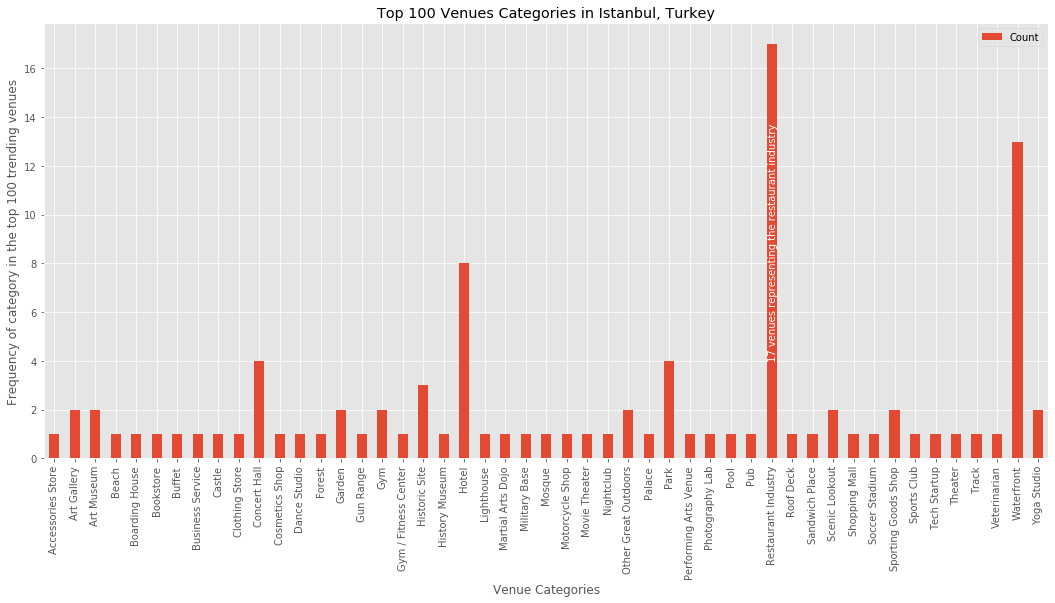

In [53]:
ist_category_count.plot(kind='bar', figsize=(18, 8), rot=90) # rotate the bars by 90 degrees

plt.xlabel('Venue Categories')
plt.ylabel('Frequency of category in the top 100 trending venues')
plt.title('Top 100 Venues Categories in Istanbul, Turkey')
plt.annotate('17 venues representing the restaurant industry', # text to display
             xy=(34.83, 4),                    # start the text at at point (year 2008 , pop 30)
             rotation= 90.0,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                     # want the text to be horizontally 'left' algned.
             color='white'
            )
plt.show()

In [54]:
indexNames2 = nearby_venues_ist[(nearby_venues_ist.categories != 'Coffee Shop')
                               & (nearby_venues_ist.categories != 'Steakhouse')
                              & (nearby_venues_ist.categories != 'Restaurant')
                              & (nearby_venues_ist.categories != 'Bakery')
                              & (nearby_venues_ist.categories != 'Cajun / Creole Restaurant')
                              & (nearby_venues_ist.categories != 'Italian Restaurant')
                              & (nearby_venues_ist.categories != 'Japanese Restaurant')
                              & (nearby_venues_ist.categories != 'Café')
                              & (nearby_venues_ist.categories != 'Doner Restaurant')
                              & (nearby_venues_ist.categories != 'Breakfast Spot')
                              & (nearby_venues_ist.categories != 'Turkish Restaurant')
                              & (nearby_venues_ist.categories != 'Chocolate Shop')
                              & (nearby_venues_ist.categories !=  'Hookah Bar')
                              & (nearby_venues_ist.categories != 'Bar')
                              & (nearby_venues_ist.categories != 'Seafood Restaurant')
                              & (nearby_venues_ist.categories != 'Pizza Place')
                             ].index
nearby_venues_ist.drop(indexNames2 , inplace=True)
nearby_venues_ist.head()

,name,categories,lat,lng
5,Etiler Gurme Kasabı & Izgara,Steakhouse,41.079847,29.044947
11,Rago Balik,Cajun / Creole Restaurant,41.068703,29.043680
18,Byulus Steakhouse&Burger,Steakhouse,41.071683,29.028886
26,color.full.bakery,Bakery,41.101750,29.051228
28,Mavi Balık Restaurant,Seafood Restaurant,41.058035,29.035684


In [55]:
nearby_venues_ist.shape

(17, 4)

In [56]:
nearby_venues_ist.drop(columns=['lat', 'lng'], axis = 1, inplace = True)
ist_name_count = nearby_venues_ist.groupby(['categories']).count() 
ist_name_count.head()

,name
categories,
Bakery,1
Bar,1
Café,2
Cajun / Creole Restaurant,1
Chocolate Shop,1


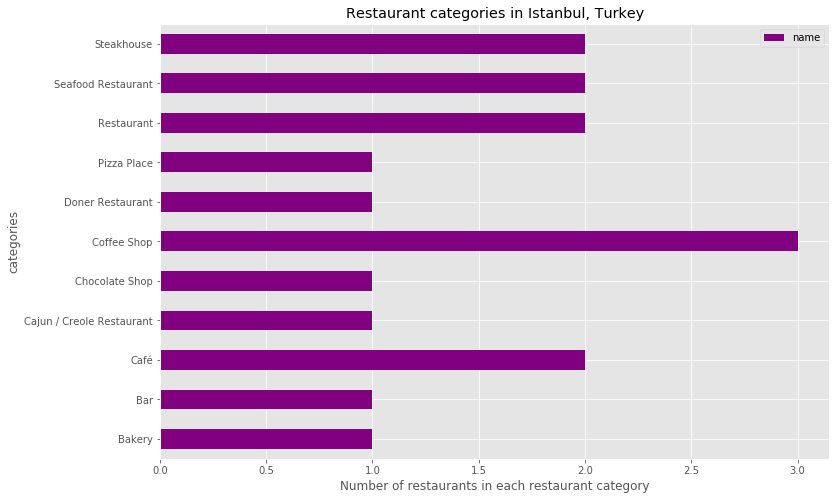

In [57]:
ist_name_count.plot(kind='barh', figsize=(12, 8), color='purple')
plt.xlabel('Number of restaurants in each restaurant category')
plt.title('Restaurant categories in Istanbul, Turkey')
plt.show()

### Sydney Data Analysis (Australia)

In [58]:
address = 'Sydney, Australia'

geolocator = Nominatim(user_agent="sy_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Sydney City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Sydney City are -33.8548157, 151.2164539.


In [59]:
sydney_latitude = -33.8548157
sydney_longitude = 151.2164539
print('Latitude and longitude values of Istanbul are {}, {}.'.format(sydney_latitude, 
                                                              sydney_longitude))

Latitude and longitude values of Istanbul are -33.8548157, 151.2164539.


In [60]:
LIMIT = 100# limit of number of venues returned by Foursquare API
radius = 10000 # define radius
# create URL
url3 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    sydney_latitude, 
    sydney_longitude, 
    radius, 
    LIMIT)
url3 # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=M3DHXPUIETMOMGWXZTAAGMRPYVE1TPQEQ4T23XB1XESBNJBK&client_secret=FSLKC11P00CMUUY0FHPP0EBV2ZZPB4HP2S1TX0DNQLEQQDG2&v=20180605&ll=-33.8548157,151.2164539&radius=10000&limit=100'

In [61]:
results = requests.get(url3).json()
results

{'meta': {'code': 200, 'requestId': '5e9d3018c546f3001b95f621'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 248,
  'suggestedBounds': {'ne': {'lat': -33.764815609999914,
    'lng': 151.3246263931379},
   'sw': {'lat': -33.94481579000009, 'lng': 151.10828140686212}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '502d0f6fe4b047ef99541af2',
       'name': 'Sydney Opera House - Concert Hall',
       'location': {'address': '2 Macquarie St',
        'lat': -33.856594787181294,
        'lng': 151.21505812823835,
        'labeledLatLngs': [{'label': 'display',


In [62]:
venues3 = results['response']['groups'][0]['items']
    
nearby_venues_syd = json_normalize(venues3) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_syd =nearby_venues_syd.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_syd['venue.categories'] = nearby_venues_syd.apply(get_category_type, axis=1)

# clean columns
nearby_venues_syd.columns = [col.split(".")[-1] for col in nearby_venues_syd.columns]

nearby_venues_syd.head()

C:\Users\Parachute\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Sydney Opera House - Concert Hall,Concert Hall,-33.856595,151.215058
1,Sydney Opera House - Playhouse,Theater,-33.857518,151.214559
2,Sydney Opera House - Studio,Theater,-33.856991,151.214482
3,Sydney Opera House,Opera House,-33.857260,151.215040
4,Opera Kitchen,Café,-33.857972,151.213989


In [63]:
nearby_venues_syd.categories.unique()

array(['Concert Hall', 'Theater', 'Opera House', 'Café', 'Cocktail Bar',
       'Bridge', 'Scenic Lookout', 'Trail', 'Monument / Landmark',
       'Tour Provider', 'Botanical Garden', 'Hotel', 'Park', 'Pub',
       'Art Gallery', 'Art Museum', 'Library', 'Pool', 'Burger Joint',
       'Bakery', 'Garden', 'Sandwich Place', 'Bookstore',
       'Clothing Store', 'Shopping Mall', 'Candy Store', 'Coffee Shop',
       'Hotel Bar', 'Liquor Store', 'Ice Cream Shop', 'Bar', 'Zoo',
       'Thai Restaurant', 'Yoga Studio', 'Chinese Restaurant', 'Butcher',
       'Playground', 'History Museum', 'Australian Restaurant',
       'Pizza Place', 'Deli / Bodega', 'Speakeasy',
       'Brazilian Restaurant', 'Beach', 'Seafood Restaurant', 'Hostel',
       'Creperie'], dtype=object)

In [64]:
sydney_venues = nearby_venues_syd.copy()
sydney_venues.head()

,name,categories,lat,lng
0,Sydney Opera House - Concert Hall,Concert Hall,-33.856595,151.215058
1,Sydney Opera House - Playhouse,Theater,-33.857518,151.214559
2,Sydney Opera House - Studio,Theater,-33.856991,151.214482
3,Sydney Opera House,Opera House,-33.857260,151.215040
4,Opera Kitchen,Café,-33.857972,151.213989


In [65]:
sydney_venues.replace(to_replace =["Café", "Cocktail Bar", "Burger Joint", "Ice Cream Shop", "Pub", 
                                 "Pizza Place", "Bakery", "Whisky Bar", "Sandwich Place", "Coffee Shop", 
                                 "Hotel Bar", "Asian Restaurant", "Bar", "South Indian Restaurant", "Restaurant", 
                                  "Thai Restaurant", "Chinese Restaurant", "Australian Restaurant", "Brazilian Restaurant", 
                                  "Vegetarian / Vegan Restaurant", "Seafood Restaurant"],  
                            value ="Restaurant Industry", inplace = True)
sydney_venues.head(15)

,name,categories,lat,lng
0,Sydney Opera House - Concert Hall,Concert Hall,-33.856595,151.215058
1,Sydney Opera House - Playhouse,Theater,-33.857518,151.214559
2,Sydney Opera House - Studio,Theater,-33.856991,151.214482
3,Sydney Opera House,Opera House,-33.857260,151.215040
4,Opera Kitchen,Restaurant Industry,-33.857972,151.213989
5,Drama Theatre,Theater,-33.856863,151.214759
6,Opera Bar,Restaurant Industry,-33.858409,151.213976
7,Sydney Harbour Bridge,Bridge,-33.852289,151.210681
8,Mrs. Macquarie's Point,Scenic Lookout,-33.859395,151.222204
9,Kirribilli Lookout,Scenic Lookout,-33.849323,151.213298


In [66]:
sydney_venues.drop(columns=['lat', 'lng'], axis = 1, inplace = True)
syd_category_count = sydney_venues.groupby(['categories']).count() 
syd_category_count.rename(columns = {'name':'Count'}, inplace = True) 
syd_category_count.reset_index()
syd_category_count.head()

,Count
categories,
Art Gallery,2
Art Museum,1
Beach,2
Bookstore,1
Botanical Garden,1


In [67]:
syd_category_count.shape

(32, 1)

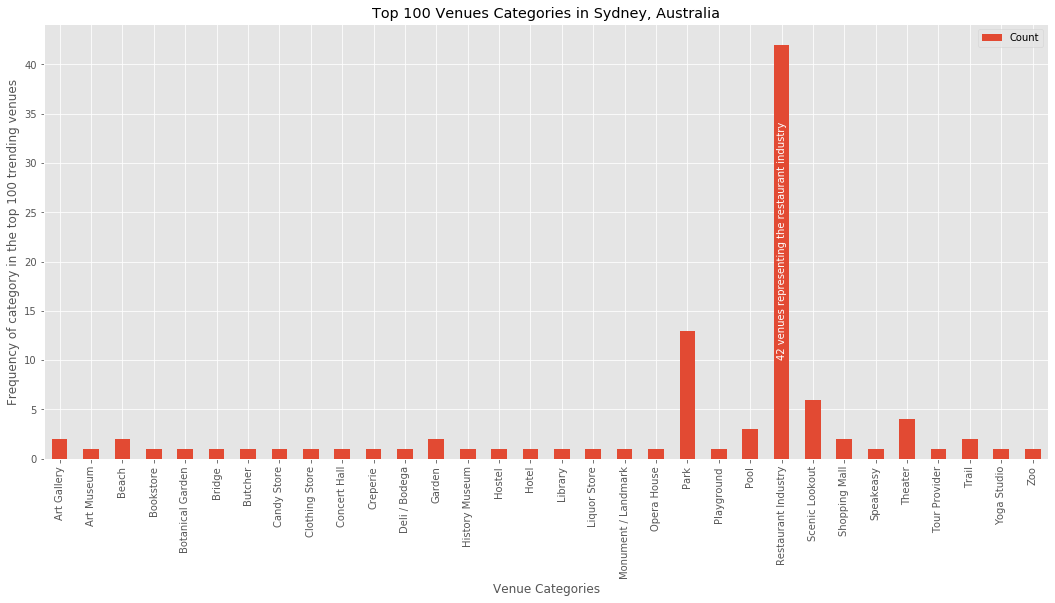

In [68]:
syd_category_count.plot(kind='bar', figsize=(18, 8), rot=90) # rotate the bars by 90 degrees

plt.xlabel('Venue Categories')
plt.ylabel('Frequency of category in the top 100 trending venues')
plt.title('Top 100 Venues Categories in Sydney, Australia')
plt.annotate('42 venues representing the restaurant industry', # text to display
             xy=(22.87, 10),                    # start the text at at point (year 2008 , pop 30)
             rotation= 90.0,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                     # want the text to be horizontally 'left' algned.
             color='white'
            )
plt.show()

In [69]:
indexNames3 = nearby_venues_syd[(nearby_venues_syd.categories != 'Café')
                               & (nearby_venues_syd.categories!= 'Cocktail Bar')
                              & (nearby_venues_syd.categories != 'Burger Joint')
                              & (nearby_venues_syd.categories != 'Ice Cream Shop')
                              & (nearby_venues_syd.categories != 'Pub')
                              & (nearby_venues_syd.categories != 'Pizza Place')
                              & (nearby_venues_syd.categories != 'Bakery')
                              & (nearby_venues_syd.categories != 'Whisky Bar')
                              & (nearby_venues_syd.categories != 'Sandwich Place')
                              & (nearby_venues_syd.categories != 'Coffee Shop')
                              & (nearby_venues_syd.categories != 'Hotel Bar')
                              & (nearby_venues_syd.categories != 'Asian Restaurant')
                              & (nearby_venues_syd.categories !=  'Bar')
                              & (nearby_venues_syd.categories != 'South Indian Restaurant')
                              & (nearby_venues_syd.categories != 'Restaurant')
                              & (nearby_venues_syd.categories != 'Thai Restaurant')
                              & (nearby_venues_syd.categories != 'Chinese Restaurant')
                              & (nearby_venues_syd.categories != 'Australian Restaurant')
                              & (nearby_venues_syd.categories != 'Brazilian Restaurant')
                              & (nearby_venues_syd.categories != 'Vegetarian / Vegan Restaurant')
                              & (nearby_venues_syd.categories != 'Seafood Restaurant')
                             ].index
nearby_venues_syd.drop(indexNames3 , inplace=True)
nearby_venues_syd.head(15)

,name,categories,lat,lng
4,Opera Kitchen,Café,-33.857972,151.213989
6,Opera Bar,Cocktail Bar,-33.858409,151.213976
20,The Glenmore Rooftop Hotel,Pub,-33.858632,151.207464
25,Bar Luca,Burger Joint,-33.864078,151.211626
26,Bourke Street Bakery,Bakery,-33.864570,151.201480
31,Coffee Tea & Me,Café,-33.871142,151.225231
32,John Montagu,Sandwich Place,-33.872595,151.218374
34,Room 10,Café,-33.872394,151.224395
38,Grandma's Bar,Cocktail Bar,-33.872138,151.205636
41,Normcore Coffee Roasters,Coffee Shop,-33.874676,151.208920


In [70]:
nearby_venues_syd.shape

(42, 4)

In [71]:
nearby_venues_syd.drop(columns=['lat', 'lng'], axis = 1, inplace = True)
syd_name_count = nearby_venues_syd.groupby(['categories']).count() 
syd_name_count.head()

,name
categories,
Australian Restaurant,1
Bakery,4
Bar,2
Brazilian Restaurant,1
Burger Joint,1


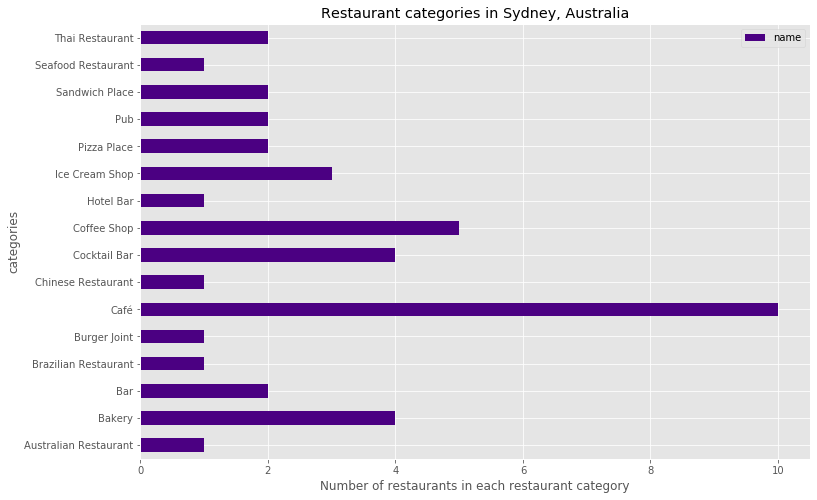

In [72]:
syd_name_count.plot(kind='barh', figsize=(12, 8), color='indigo')
plt.xlabel('Number of restaurants in each restaurant category')
plt.title('Restaurant categories in Sydney, Australia')
plt.show()

### New York Analysis (North America)

In [73]:
address = 'New York, United States of America '

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [74]:
newyork_latitude = 40.7127281
newyork_longitude = -74.0060152
print('Latitude and longitude values of New York are {}, {}.'.format(newyork_latitude, 
                                                              newyork_longitude))

Latitude and longitude values of New York are 40.7127281, -74.0060152.


In [75]:
LIMIT = 100# limit of number of venues returned by Foursquare API
radius = 10000 # define radius
# create URL
url4 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    newyork_latitude, 
    newyork_longitude, 
    radius, 
    LIMIT)
url4 # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=M3DHXPUIETMOMGWXZTAAGMRPYVE1TPQEQ4T23XB1XESBNJBK&client_secret=FSLKC11P00CMUUY0FHPP0EBV2ZZPB4HP2S1TX0DNQLEQQDG2&v=20180605&ll=40.7127281,-74.0060152&radius=10000&limit=100'

In [76]:
results = requests.get(url4).json()
results

{'meta': {'code': 200, 'requestId': '5e9d30480be7b4001c5af60b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'New York',
  'headerFullLocation': 'New York',
  'headerLocationGranularity': 'city',
  'totalResults': 237,
  'suggestedBounds': {'ne': {'lat': 40.80272819000009,
    'lng': -73.8875016126839},
   'sw': {'lat': 40.62272800999991, 'lng': -74.12452878731608}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '57c640ad498e74977f98372f',
       'name': 'Four Seasons Hotel New York Downtown',
       'location': {'address': '27 Barclay St',
        'crossStreet': 'Broadway',
        'lat': 40.71261246501983,
        'lng': -74.00938032087

In [77]:
venues4 = results['response']['groups'][0]['items']
    
nearby_venues_ny = json_normalize(venues4) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_ny =nearby_venues_ny.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_ny['venue.categories'] = nearby_venues_ny.apply(get_category_type, axis=1)

# clean columns
nearby_venues_ny.columns = [col.split(".")[-1] for col in nearby_venues_ny.columns]

nearby_venues_ny.head()

C:\Users\Parachute\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Four Seasons Hotel New York Downtown,Hotel,40.712612,-74.009380
1,9/11 Memorial North Pool,Memorial Site,40.712077,-74.013187
2,One World Trade Center,Building,40.713069,-74.013133
3,Juice Press,Vegetarian / Vegan Restaurant,40.714788,-74.011132
4,Washington Market Park,Playground,40.717046,-74.011095


In [78]:
nearby_venues_ny.categories.unique()

array(['Hotel', 'Memorial Site', 'Building',
       'Vegetarian / Vegan Restaurant', 'Playground', 'Restaurant',
       'Coffee Shop', 'Music Venue', 'French Restaurant', 'Park',
       'Bridge', 'Volleyball Court', 'Indie Movie Theater', 'Plaza',
       'Italian Restaurant', 'Bookstore', 'Theme Park Ride / Attraction',
       'Beach', 'Movie Theater', 'Scenic Lookout', 'Gourmet Shop',
       'Wine Shop', 'Pier', 'Cheese Shop', 'Vietnamese Restaurant',
       'Sandwich Place', 'Soccer Field', 'Garden', 'Theater', 'Dog Run',
       'Trail', 'Art Gallery', 'Bagel Shop', 'Japanese Restaurant',
       'Deli / Bodega', 'Bakery', 'Beer Store', 'Beer Bar',
       'Falafel Restaurant', 'Mediterranean Restaurant', 'Farmers Market',
       'Café', 'Fish Market', 'Ice Cream Shop', 'Art Museum',
       'Furniture / Home Store', 'Sushi Restaurant', 'Cocktail Bar',
       'Bike Shop', 'Pizza Place', 'Hot Dog Joint', 'Yoga Studio',
       'Athletics & Sports', 'Event Space', 'Seafood Restaurant',
   

In [79]:
newyork_venues = nearby_venues_ny.copy()
newyork_venues.head()

,name,categories,lat,lng
0,Four Seasons Hotel New York Downtown,Hotel,40.712612,-74.009380
1,9/11 Memorial North Pool,Memorial Site,40.712077,-74.013187
2,One World Trade Center,Building,40.713069,-74.013133
3,Juice Press,Vegetarian / Vegan Restaurant,40.714788,-74.011132
4,Washington Market Park,Playground,40.717046,-74.011095


In [80]:
newyork_venues.replace(to_replace =["Restaurant", "Salad Place", "French Restaurant", "Thai Restaurant", "Italian Restaurant", 
                                 "Gourmet Shop", "Sandwich Place", "Seafood Restaurant", "Bagel Shop", "Japanese Restaurant", 
                                 "Ice Cream Shop", "Bakery", "Steakhouse", "Falafel Restaurant", "Hot Dog Joint", 
                                  "Pizza Place", "Taco Place", "Sushi Restaurant", "Cocktail Bar", "Beer Bar", "Fried Chicken Joint", 
                                   "Vietnamese Restaurant", "Coffee Shop",  "Israeli Restaurant", "Mediterranean Restaurant"],  
                            value ="Restaurant Industry", inplace = True)
newyork_venues.head(15)

,name,categories,lat,lng
0,Four Seasons Hotel New York Downtown,Hotel,40.712612,-74.009380
1,9/11 Memorial North Pool,Memorial Site,40.712077,-74.013187
2,One World Trade Center,Building,40.713069,-74.013133
3,Juice Press,Vegetarian / Vegan Restaurant,40.714788,-74.011132
4,Washington Market Park,Playground,40.717046,-74.011095
5,National September 11 Memorial & Museum (Natio...,Memorial Site,40.711451,-74.013433
6,Crown Shy,Restaurant Industry,40.706187,-74.007490
7,Black Fox Coffee Co.,Restaurant Industry,40.706573,-74.008155
8,The Rooftop @ Pier 17,Music Venue,40.705463,-74.001598
9,Le Coucou,Restaurant Industry,40.719114,-74.000202


In [81]:
newyork_venues.drop(columns=['lat', 'lng'], axis = 1, inplace = True)
ny_category_count = newyork_venues.groupby(['categories']).count() 
ny_category_count.rename(columns = {'name':'Count'}, inplace = True) 
ny_category_count.reset_index()
ny_category_count.head()

,Count
categories,
Art Gallery,2
Art Museum,1
Athletics & Sports,1
Beach,1
Beer Store,1


In [82]:
ny_category_count.shape

(38, 1)

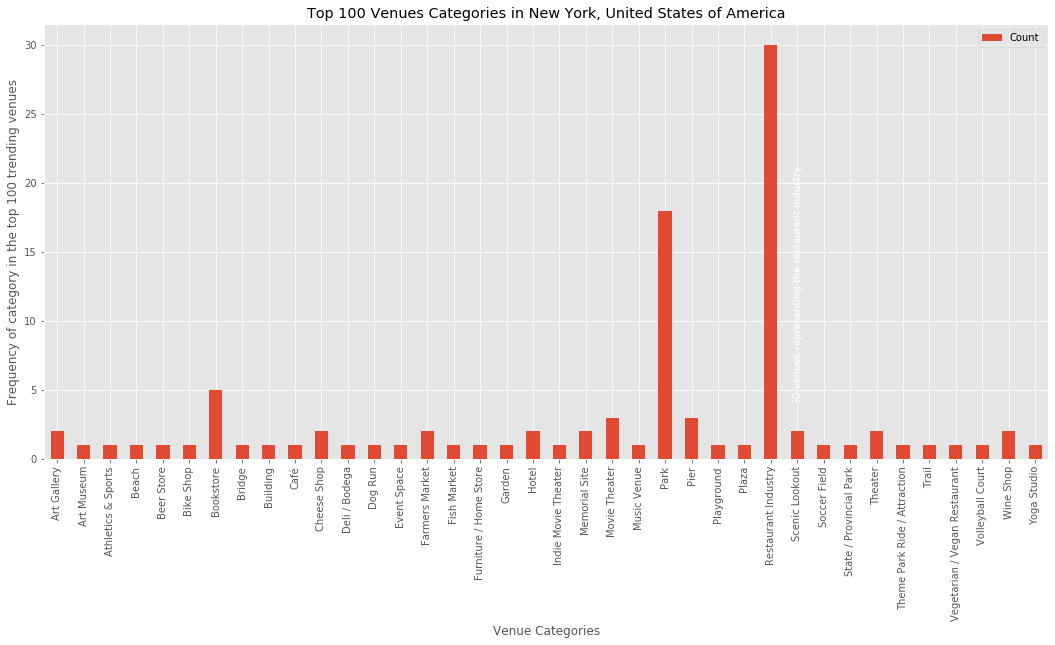

In [83]:
ny_category_count.plot(kind='bar', figsize=(18, 8), rot=90) # rotate the bars by 90 degrees

plt.xlabel('Venue Categories')
plt.ylabel('Frequency of category in the top 100 trending venues')
plt.title('Top 100 Venues Categories in New York, United States of America')
plt.annotate('30 venues representing the restaurant industry', # text to display
             xy=(27.85, 4),                    # start the text at at point (year 2008 , pop 30)
             rotation= 90.0,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                     # want the text to be horizontally 'left' algned.
             color='white'
            )
plt.show()

In [84]:
indexNames4 = nearby_venues_ny[(nearby_venues_ny.categories != 'Restaurant')
                               & (nearby_venues_ny.categories != 'Salad Place')
                              & (nearby_venues_ny.categories != 'French Restaurant')
                              & (nearby_venues_ny.categories != 'Thai Restaurant')
                              & (nearby_venues_ny.categories != 'Italian Restaurant')
                              & (nearby_venues_ny.categories != 'Gourmet Shop')
                              & (nearby_venues_ny.categories != 'Sandwich Place')
                              & (nearby_venues_ny.categories != 'Seafood Restaurant')
                              & (nearby_venues_ny.categories != 'Bagel Shop')
                              & (nearby_venues_ny.categories != 'Japanese Restaurant')
                              & (nearby_venues_ny.categories != 'Ice Cream Shop')
                              & (nearby_venues_ny.categories != 'Bakery')
                              & (nearby_venues_ny.categories !=  'Steakhouse')
                              & (nearby_venues_ny.categories != 'Falafel Restaurant')
                              & (nearby_venues_ny.categories != 'Hot Dog Joint')
                              & (nearby_venues_ny.categories != 'Pizza Place')
                              & (nearby_venues_ny.categories != 'Taco Place')
                              & (nearby_venues_ny.categories != 'Sushi Restaurant')
                              & (nearby_venues_ny.categories != 'Cocktail Bar')
                              & (nearby_venues_ny.categories != 'Beer Bar')
                              & (nearby_venues_ny.categories != 'Fried Chicken Joint')
                              & (nearby_venues_ny.categories != 'Vietnamese Restaurant')
                              & (nearby_venues_ny.categories != 'Coffee Shop')
                              & (nearby_venues_ny.categories != 'Israeli Restaurant')
                              & (nearby_venues_ny.categories != 'Mediterranean Restaurant')
                               ].index
nearby_venues_ny.drop(indexNames4 , inplace=True)
nearby_venues_ny.head(15)

,name,categories,lat,lng
6,Crown Shy,Restaurant,40.706187,-74.007490
7,Black Fox Coffee Co.,Coffee Shop,40.706573,-74.008155
9,Le Coucou,French Restaurant,40.719114,-74.000202
19,Rubirosa Ristorante,Italian Restaurant,40.722706,-73.995957
26,Raffetto's,Gourmet Shop,40.728010,-74.001949
30,Ginger & Lemongrass,Vietnamese Restaurant,40.719289,-73.985630
31,Faicco's Italian Specialties,Sandwich Place,40.731117,-74.003043
40,Brooklyn Bagel & Coffee Company,Bagel Shop,40.730913,-73.993259
42,Suki Curry,Japanese Restaurant,40.727157,-73.986134
46,Mah-Ze-Dahr Bakery,Bakery,40.735117,-74.000052


In [85]:
nearby_venues_ny.shape

(30, 4)

In [86]:
nearby_venues_ny.drop(columns=['lat', 'lng'], axis = 1, inplace = True)
ny_name_count = nearby_venues_ny.groupby(['categories']).count() 
ny_name_count.head()

,name
categories,
Bagel Shop,1
Bakery,4
Beer Bar,1
Cocktail Bar,1
Coffee Shop,1


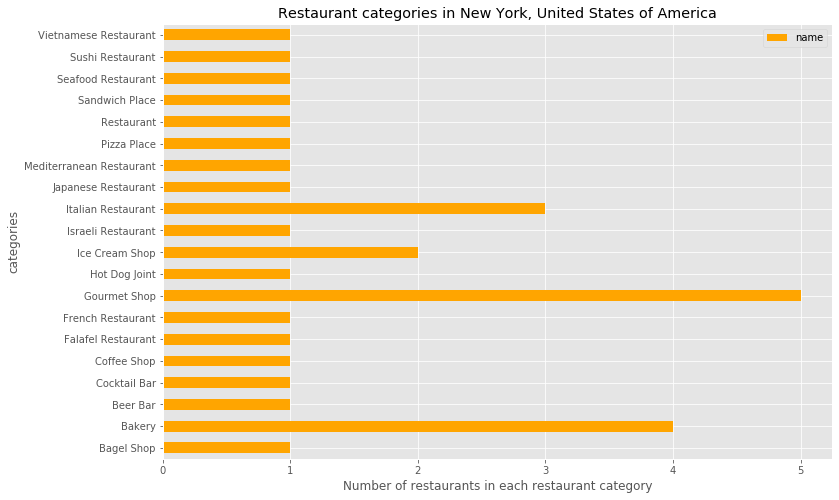

In [87]:
ny_name_count.plot(kind='barh', figsize=(12, 8), color='orange')
plt.xlabel('Number of restaurants in each restaurant category')
plt.title('Restaurant categories in New York, United States of America')
plt.show()

### Sao Paulo Analysis (South America)

In [88]:
address = 'Sao Paulo, Brazil'

geolocator = Nominatim(user_agent="sp_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Sao Paulo City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Sao Paulo City are -23.5506507, -46.6333824.


In [89]:
saopaulo_latitude =  -23.5506507
saopaulo_longitude = -46.6333824
print('Latitude and longitude values of Sao Paulo are {}, {}.'.format(saopaulo_latitude, 
                                                              saopaulo_longitude))

Latitude and longitude values of Sao Paulo are -23.5506507, -46.6333824.


In [90]:
LIMIT = 100# limit of number of venues returned by Foursquare API
radius = 10000 # define radius
# create URL
url5 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    saopaulo_latitude, 
    saopaulo_longitude, 
    radius, 
    LIMIT)
url5 # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=M3DHXPUIETMOMGWXZTAAGMRPYVE1TPQEQ4T23XB1XESBNJBK&client_secret=FSLKC11P00CMUUY0FHPP0EBV2ZZPB4HP2S1TX0DNQLEQQDG2&v=20180605&ll=-23.5506507,-46.6333824&radius=10000&limit=100'

In [91]:
results = requests.get(url5).json()
results

{'meta': {'code': 200, 'requestId': '5e9d2ff8d039930028f4aeec'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'São Paulo',
  'headerFullLocation': 'São Paulo',
  'headerLocationGranularity': 'city',
  'totalResults': 220,
  'suggestedBounds': {'ne': {'lat': -23.46065060999991,
    'lng': -46.53538813506399},
   'sw': {'lat': -23.640650790000088, 'lng': -46.731376664936015}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '573dab3f498e4e0d56c67f4e',
       'name': 'Casa de Francisca',
       'location': {'address': 'R. Quintino Bocaiúva, 22',
        'crossStreet': 'R. Direita',
        'lat': -23.54873339376874,
        'lng': -46.63476347923278,
        'labeledLatLngs': [{'labe

In [92]:
venues5 = results['response']['groups'][0]['items']
    
nearby_venues_sp = json_normalize(venues5) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_sp =nearby_venues_sp.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_sp['venue.categories'] = nearby_venues_sp.apply(get_category_type, axis=1)

# clean columns
nearby_venues_sp.columns = [col.split(".")[-1] for col in nearby_venues_sp.columns]

nearby_venues_sp.head(15)

C:\Users\Parachute\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Casa de Francisca,Music Venue,-23.548733,-46.634763
1,Theatro Municipal de São Paulo,Theater,-23.545477,-46.638812
2,Loretta,Cosmetics Shop,-23.555802,-46.635311
3,Famiglia Franciulli,Bakery,-23.558771,-46.630604
4,Praça das Artes,Cultural Center,-23.544416,-46.637102
5,Por um Punhado de Dólares,Coffee Shop,-23.548488,-46.645305
6,A Casa do Porco,Brazilian Restaurant,-23.544887,-46.644622
7,Padaria Italiana São Domingos,Bakery,-23.552873,-46.645441
8,Sorveteria do Centro,Ice Cream Shop,-23.546062,-46.645810
9,Z Deli Sandwiches,Sandwich Place,-23.544687,-46.645601


In [93]:
nearby_venues_sp.categories.unique()

array(['Music Venue', 'Theater', 'Cosmetics Shop', 'Bakery',
       'Cultural Center', 'Coffee Shop', 'Brazilian Restaurant',
       'Ice Cream Shop', 'Sandwich Place', 'Organic Grocery',
       'Art Museum', 'Concert Hall', 'Pizza Place',
       'Fruit & Vegetable Store', 'Pastelaria', 'Park',
       'Italian Restaurant', 'Bookstore', 'Coworking Space', 'Restaurant',
       'Health Food Store', 'Dive Bar', 'Burger Joint',
       'Spiritual Center', 'Grocery Store', 'Shoe Store',
       'Peruvian Restaurant', 'Pet Store', 'Big Box Store', 'Bar',
       'Yoga Studio', 'Athletics & Sports', 'Portuguese Restaurant',
       'Sports Club', 'Monument / Landmark', 'Steakhouse',
       'Furniture / Home Store', 'Art Gallery', 'Hotel', 'Plaza',
       'Supermarket', 'Churrascaria', 'Soccer Stadium', 'Deli / Bodega',
       'Skate Park', 'Japanese Restaurant', 'Paella Restaurant',
       'Optical Shop', 'Street Art', 'Gluten-free Restaurant', 'Office',
       'Gym / Fitness Center', 'Vegetarian 

In [94]:
sao_venues = nearby_venues_sp.copy()
sao_venues.head()

,name,categories,lat,lng
0,Casa de Francisca,Music Venue,-23.548733,-46.634763
1,Theatro Municipal de São Paulo,Theater,-23.545477,-46.638812
2,Loretta,Cosmetics Shop,-23.555802,-46.635311
3,Famiglia Franciulli,Bakery,-23.558771,-46.630604
4,Praça das Artes,Cultural Center,-23.544416,-46.637102


In [95]:
sao_venues.replace(to_replace =["Dessert Shop", "Bakery", "Coffee Shop", "Brazilian Restaurant", "Peruvian Restaurant", 
                                 "Pizza Place", "Pastelaria", "Ice Cream Shop", "Japanese Restaurant", "Indian Restaurant", 
                                 "Restaurant", "Hotel Bar", "Sandwich Place", "Churrascaria", "Vegetarian / Vegan Restaurant", 
                                  "Mediterranean Restaurant", "Steakhouse", "Italian Restaurant", "Argentinian Restaurant", 
                               "Portuguese Restaurant", "Baiano Restaurant", "Dive Bar", "Burger Joint", "Bar",  "Café", 
                               "Gluten-free Restaurant", "Paella Restaurant"],  
                            value ="Restaurant Industry", inplace = True)
sao_venues.head()

,name,categories,lat,lng
0,Casa de Francisca,Music Venue,-23.548733,-46.634763
1,Theatro Municipal de São Paulo,Theater,-23.545477,-46.638812
2,Loretta,Cosmetics Shop,-23.555802,-46.635311
3,Famiglia Franciulli,Restaurant Industry,-23.558771,-46.630604
4,Praça das Artes,Cultural Center,-23.544416,-46.637102


In [96]:
sao_venues.drop(columns=['lat', 'lng'], axis = 1, inplace = True)
sp_category_count = sao_venues.groupby(['categories']).count() 
sp_category_count.rename(columns = {'name':'Count'}, inplace = True) 
sp_category_count.reset_index()
sp_category_count.head()

,Count
categories,
Art Gallery,2
Art Museum,5
Athletics & Sports,2
Big Box Store,2
Bookstore,3


In [97]:
sp_category_count.shape

(36, 1)

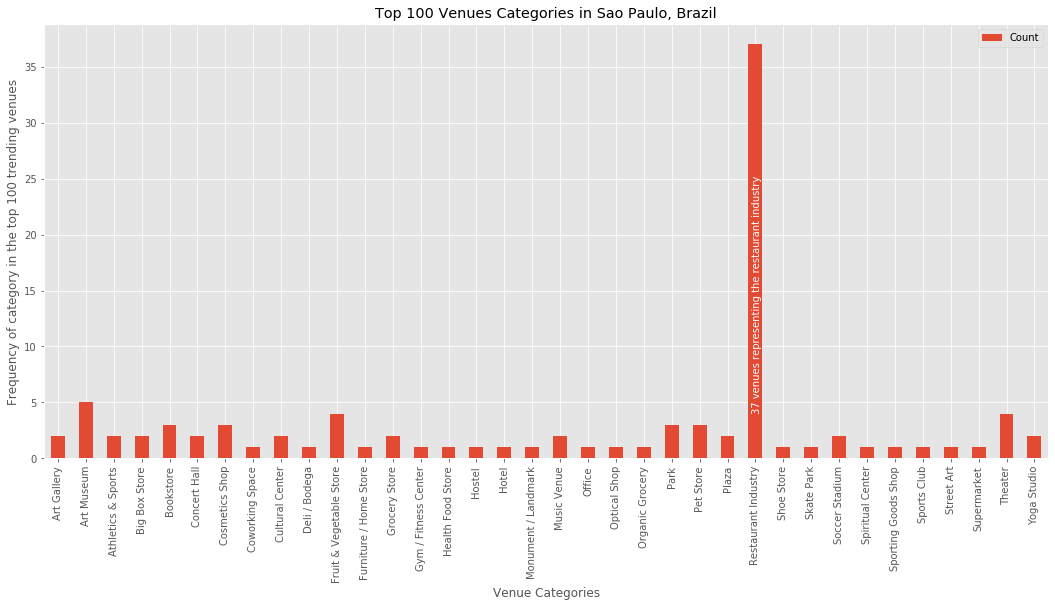

In [98]:
sp_category_count.plot(kind='bar', figsize=(18, 8), rot=90) # rotate the bars by 90 degrees

plt.xlabel('Venue Categories')
plt.ylabel('Frequency of category in the top 100 trending venues')
plt.title('Top 100 Venues Categories in Sao Paulo, Brazil')
plt.annotate('37 venues representing the restaurant industry', # text to display
             xy=(24.87, 4),                    # start the text at at point (year 2008 , pop 30)
             rotation= 90.0,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                     # want the text to be horizontally 'left' algned.
             color='white'
            )
plt.show()

In [99]:
indexNames5 = nearby_venues_sp[(nearby_venues_sp.categories != 'Dessert Shop')
                               & (nearby_venues_sp.categories != 'Bakery')
                              & (nearby_venues_sp.categories != 'Coffee Shop')
                              & (nearby_venues_sp.categories != 'Brazilian Restaurant')
                              & (nearby_venues_sp.categories != 'Peruvian Restaurant')
                              & (nearby_venues_sp.categories != 'Pizza Place')
                              & (nearby_venues_sp.categories != 'Pastelaria')
                              & (nearby_venues_sp.categories != 'Ice Cream Shop')
                              & (nearby_venues_sp.categories != 'Japanese Restaurant')
                              & (nearby_venues_sp.categories != 'Indian Restaurant')
                              & (nearby_venues_sp.categories != 'Restaurant')
                              & (nearby_venues_sp.categories != 'Hotel Bar')
                              & (nearby_venues_sp.categories !=  'Sandwich Place')
                              & (nearby_venues_sp.categories != 'Churrascaria')
                              & (nearby_venues_sp.categories !=  'Vegetarian / Vegan Restaurant')
                              & (nearby_venues_sp.categories != 'Mediterranean Restaurant')
                              & (nearby_venues_sp.categories != 'Steakhouse')
                              & (nearby_venues_sp.categories != 'Italian Restaurant')
                              & (nearby_venues_sp.categories != 'Argentinian Restaurant')
                              & (nearby_venues_sp.categories != 'Portuguese Restaurant')
                              & (nearby_venues_sp.categories != 'Baiano Restaurant')
                              & (nearby_venues_sp.categories != 'Dive Bar')
                              & (nearby_venues_sp.categories != 'Burger Joint')
                              & (nearby_venues_sp.categories != 'Bar')
                              & (nearby_venues_sp.categories != 'Café')
                              & (nearby_venues_sp.categories != 'Gluten-free Restaurant')
                              & (nearby_venues_sp.categories != 'Paella Restaurant')
                               ].index
nearby_venues_sp.drop(indexNames5 , inplace=True)
nearby_venues_sp.head(15)

,name,categories,lat,lng
3,Famiglia Franciulli,Bakery,-23.558771,-46.630604
5,Por um Punhado de Dólares,Coffee Shop,-23.548488,-46.645305
6,A Casa do Porco,Brazilian Restaurant,-23.544887,-46.644622
7,Padaria Italiana São Domingos,Bakery,-23.552873,-46.645441
8,Sorveteria do Centro,Ice Cream Shop,-23.546062,-46.645810
9,Z Deli Sandwiches,Sandwich Place,-23.544687,-46.645601
13,Veridiana Pizzaria,Pizza Place,-23.545320,-46.651945
15,Pastel de Feira,Pastelaria,-23.570628,-46.634103
20,Jardim de Napoli,Italian Restaurant,-23.542636,-46.655838
24,Rei das Esfihas,Restaurant,-23.531984,-46.617935


In [100]:
nearby_venues_sp.shape

(37, 4)

In [101]:
nearby_venues_sp.drop(columns=['lat', 'lng'], axis = 1, inplace = True)
nearby_venues_sp.head()

,name,categories
3,Famiglia Franciulli,Bakery
5,Por um Punhado de Dólares,Coffee Shop
6,A Casa do Porco,Brazilian Restaurant
7,Padaria Italiana São Domingos,Bakery
8,Sorveteria do Centro,Ice Cream Shop


In [102]:
sp_name_count = nearby_venues_sp.groupby(['categories']).count() 
sp_name_count.head()

,name
categories,
Bakery,3
Bar,2
Brazilian Restaurant,2
Burger Joint,2
Churrascaria,1


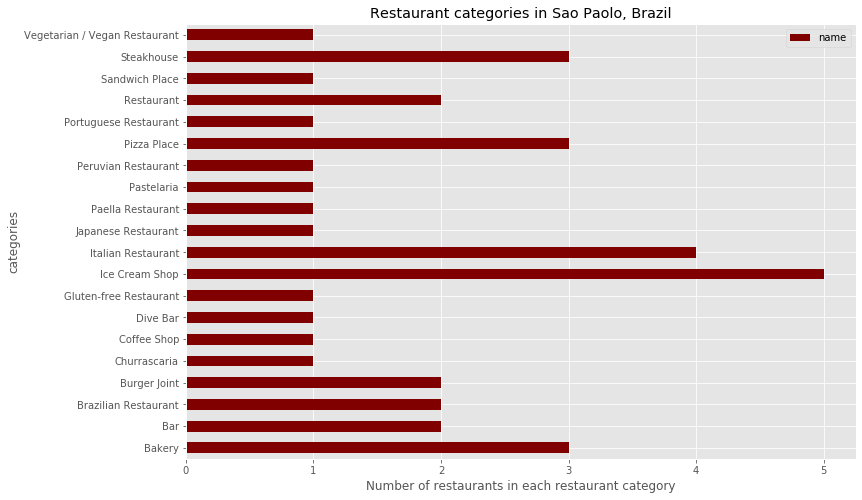

In [103]:
sp_name_count.plot(kind='barh', figsize=(12, 8), color='maroon')
plt.xlabel('Number of restaurants in each restaurant category')
plt.title('Restaurant categories in Sao Paolo, Brazil')
plt.show()

### Common venue categories 
The above data frames were then combined to understand the overall distribution of Restaurant venues across all continents. 

In [104]:
frames = [nearby_venues_sp, nearby_venues_ny, nearby_venues_lag, nearby_venues_ist, nearby_venues_syd, nearby_venues_tyo]
venues = pd.concat(frames, keys=['Sao Paulo', 'New York', 'Lagos', 'Istanbul', 'Sydney', 'Tokyo'])
venues

name            categories
Sao Paulo 3                Famiglia Franciulli                Bakery
          5          Por um Punhado de Dólares           Coffee Shop
          6                    A Casa do Porco  Brazilian Restaurant
          7      Padaria Italiana São Domingos                Bakery
          8               Sorveteria do Centro        Ice Cream Shop
...                                        ...                   ...
Tokyo     82                  Innsyoutei (韻松亭)    Kaiseki Restaurant
          86                             SAVOY           Pizza Place
          91             ARiSE Coffee Roasters           Coffee Shop
          94                 Pelican (パンのペリカン)                Bakery
          97  Ogasawara Hakushaku-tei (小笠原伯爵邸)    Spanish Restaurant

[229 rows x 2 columns]

The appended dataframe gives the most frequent restaurant industry venue category

In [105]:
frequency = venues.categories.value_counts()
frequency.head()

Coffee Shop       15
Café              15
Ice Cream Shop    14
Bakery            13
Pizza Place       12
Name: categories, dtype: int64

I then merged the dataframes to find the common veue categories in all the six cities

In [106]:
import pandas as pd
from functools import reduce

In [107]:
data_frames = [nearby_venues_sp, nearby_venues_ny, nearby_venues_lag, nearby_venues_ist, nearby_venues_syd, nearby_venues_tyo]
venues_merged = reduce(lambda  left,right: pd.merge(left,right,on=['categories'],
                                            how='inner'), data_frames)

In [108]:
most_frequent= pd. DataFrame(venues_merged)
most_frequent.head(24)

,name_x,categories,name_y,name_x,name_y,name_x,name_y
0,Veridiana Pizzaria,Pizza Place,Lucali,Pizze-riah Wood-fired pizza,Raffaele - Maestro Di Pizza,Vacanza In The Hills,SAVOY
1,Veridiana Pizzaria,Pizza Place,Lucali,Pizze-riah Wood-fired pizza,Raffaele - Maestro Di Pizza,Rosso Pomodoro,SAVOY
2,Veridiana Pizzaria,Pizza Place,Lucali,Domino's Pizza,Raffaele - Maestro Di Pizza,Vacanza In The Hills,SAVOY
3,Veridiana Pizzaria,Pizza Place,Lucali,Domino's Pizza,Raffaele - Maestro Di Pizza,Rosso Pomodoro,SAVOY
4,Veridiana Pizzaria,Pizza Place,Lucali,Domino Pizza,Raffaele - Maestro Di Pizza,Vacanza In The Hills,SAVOY
5,Veridiana Pizzaria,Pizza Place,Lucali,Domino Pizza,Raffaele - Maestro Di Pizza,Rosso Pomodoro,SAVOY
6,Veridiana Pizzaria,Pizza Place,Lucali,Domino's Pizza,Raffaele - Maestro Di Pizza,Vacanza In The Hills,SAVOY
7,Veridiana Pizzaria,Pizza Place,Lucali,Domino's Pizza,Raffaele - Maestro Di Pizza,Rosso Pomodoro,SAVOY
8,Di Bari Pizza,Pizza Place,Lucali,Pizze-riah Wood-fired pizza,Raffaele - Maestro Di Pizza,Vacanza In The Hills,SAVOY
9,Di Bari Pizza,Pizza Place,Lucali,Pizze-riah Wood-fired pizza,Raffaele - Maestro Di Pizza,Rosso Pomodoro,SAVOY


The above dataframe indicates that only the 'Pizza Place' category is common to all six cities

### Incorporating Population Data

Since we have calculated number of restaurant industry venues witin a 10 km radius in each of the aforementione cities, we need a population statistic that takes into account the area. Therefore we will be using the variable population density (per square km) 
The sources for these numbers are as follows: 
1. Tokyo density (6,158): https://www.metro.tokyo.lg.jp/ENGLISH/ABOUT/HISTORY/history03.htm
2. Lagos Density (6,871): https://worldpopulationreview.com/world-cities/lagos-population/
3. Istanbul Density (2,523): https://worldpopulationreview.com/world-cities/istanbul-population/
4. Sydney Density (2037): https://en.wikipedia.org/wiki/Demographics_of_Sydney
5. New York Density (10,431):https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population_density
6. Sao Paulo Densty (7,216): https://worldpopulationreview.com/world-cities/sao-paulo-population/



In [109]:
data = {'City':['Tokyo', 'Lagos', 'Istanbul', 'Sydney', 'New York', 'Sao Paulo'], 
        'Number of Restaurants ':[58, 46, 19, 45, 31, 39], 'Overall Venue Categories':[25, 30, 48, 31, 37, 35], 
        'Population per 10 squared km': [6158, 6871, 2523, 2037, 10431, 7261]}
# Create DataFrame 
res_pop = pd.DataFrame(data) 
res_pop

,City,Number of Restaurants,Overall Venue Categories,Population per 10 squared km
0,Tokyo,58,25,6158
1,Lagos,46,30,6871
2,Istanbul,19,48,2523
3,Sydney,45,31,2037
4,New York,31,37,10431
5,Sao Paulo,39,35,7261


Since the first part of our anlysis is based on a 10 km radius (area ~ 314 squared kilometeres) we will multiply the population density values by 314 so as to get the potential population estimation for that area. Using this data and the dataframes created in the first part of our data analysis we wil try to understand how the restaurant industry relates to the population of these cities

In [110]:
res_pop["Population per 10 squared km"] = 314 * res_pop["Population per 10 squared km"]

In [111]:
res_pop.rename(columns = {'Population per 10 squared km': 'Potential population in a 10 km radius'}, inplace = True)
res_pop.head()

,City,Number of Restaurants,Overall Venue Categories,Potential population in a 10 km radius
0,Tokyo,58,25,1933612
1,Lagos,46,30,2157494
2,Istanbul,19,48,792222
3,Sydney,45,31,639618
4,New York,31,37,3275334


In [112]:
color = ['red', 'blue', 'green', 'maroon', 'indigo', 'orange'] 
res_pop['color'] = color
res_pop.head(6)

,City,Number of Restaurants,Overall Venue Categories,Potential population in a 10 km radius,color
0,Tokyo,58,25,1933612,red
1,Lagos,46,30,2157494,blue
2,Istanbul,19,48,792222,green
3,Sydney,45,31,639618,maroon
4,New York,31,37,3275334,indigo
5,Sao Paulo,39,35,2279954,orange


Using the above dataframe we creat a bubble plot so as to corellate all factors including **Number of Restaurants, Overall Venue Categories** and **Potential population in a 10 km radius**. We divide the total population by 1000 so as to fit the bubbles within the plot. Therefore the population value actually denotes the potential number of people per thousand of the total population within a 10 km radius. We also create a **color column** so as to denote a distinct color for each city as seen in the above dataframe.

We generate the plot using the libraries matplotlib and seaborn as follows:

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

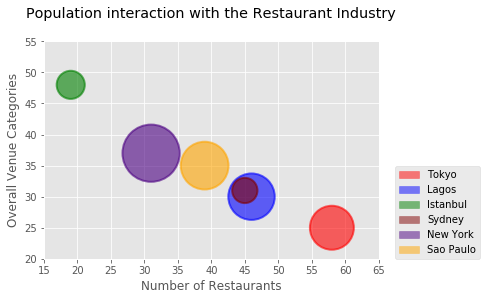

In [114]:
plt.scatter(x = [58, 46, 19, 45, 31, 39], 
            y = [25, 30, 48, 31, 37, 35], 
            s = res_pop['Potential population in a 10 km radius']/1000, 
            alpha = 0.6, 
            color=res_pop['color'], 
            linewidth=2)

plt.title('Population interaction with the Restaurant Industry', y=1.08)
plt.xlabel('Number of Restaurants', y=1.08)
plt.ylabel('Overall Venue Categories', x=1.08)
plt.xticks([15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65])
plt.yticks([20, 25, 30, 35, 40, 45, 50, 55])

city_list = list(res_pop['City'])
bubble_color_list = list(res_pop['color'])
l = []
for i in range(0,len(res_pop.index)):
    l.append(mpatches.Patch(color=bubble_color_list[i], 
                            alpha=0.5, 
                            label=city_list[i]))
    plt.legend(handles=l, loc=(1.05,0))
    
plt.show()

## Results and Discussion <a name="results"></a>

1. Highest dominance is within Tokyo that has the highest diversity in restaurant venues ( 59% venues represent restaurant) and with the least competition from other venue categories potential indicating minimal competition from other industries. This dominance can potentially indicate the affinity of Tokyo citizens for the restaurant industry. However, for the stakeholders it is also important to remember more competition from within the restaurant industry that could hinder the business growth in such an area
2. The second highest dominance of the restaurant industry is in Lagos and Sydney with 47 % ad 42% of the venues belonging to the restaurant industry respectively. The competition from other venue categories i.e. other potential industries is higher  than Tokyo in both these cases. However the population of both cities is very different with the population of Lagos being almost 3.5 times larger than that of Sydney. This is important information for the stakeholders as it could highlight that the Lagos population is more prone to spend on eating and outer outdoor activities compared to the Sydney population because both cities have similar amounts of venues within the restaurant industry and overall. Therefore this potentially highlights that Sydney will be tough spot for a potential restaurant business owner to be successful in as the citizens there are not much prone to eat out compared to a citizens in Lagos.
3. In the case of New York and Sao Paulo the restaurant industry further reduces its dominance on the city. Sao Paulo has less competition from other venue categories i.e. potential other industries compared to New York but again faces stiff competition from within the restaurant industries. It also has plenty of south American cuisine themed restaurants with categories such as 'Brazilian Restaurant', 'Peruvian Restaurant', 'Churrascaria', ‘Paella Restaurant' etc present in the city. Therefore, the Sao Paulo citizens could have an affinity for South American cuisine which can be an important insight for a stakeholder. Contrarily, in New York the restaurant industry has heavy competition with overall second highest amount of venue categories i.e. potential competition from other industries. However New York also has the highest population of all the cities being considered for this analysis. Therefore even though the competition from other industries is a lot higher compared to a city like Sydney, it will still be easier for stakeholders to get more people to invest i.e. potential customers in New York. Within the restaurant venues, the venues are diverse from general categories like ‘ Pizza place’, ‘Coffee Shop’ etc, to more exotic categories like ‘Israeli Restaurant’, ‘Japanese Restaurant’ etc. to local delicacies like ‘Hot Dog joint’, suggesting a very diverse palate for the New York citizens
4. Istanbul has the highest overall venue categories at 49. Therefore the highest competition from non-restaurant industries is here. It is also important to understand that Istanbul has the second lowest population amongst the six cities only more than Sydney. It also has the lowest amount of restaurant venues (17) with strong competition from venue categories such as Waterfronts. This suggests that the eating habits of people in the city do not encourage them from going out to eat. Therefore it can potentially be very difficult for a restaurant owner to set up a successful business in that area

### Conclusion <a name="conclusion"></a>

1.	High competition within the restaurant industry in Tokyo along with preference for local cuisine.
2.	Similar (second highest) dominance of the restaurant industry is in Lagos and Sydney. However, the vast population difference indicates that Lagos population is more prone to spend on eating and outer outdoor activities compared to the Sydney population.
3.	Sao Paulo citizens could have an affinity for South American cuisine as indicated by the presence of a wide variety South American themed restaurants.
4.	New York has the highest population of all the cities. Therefore even though the competition from other industries is higher compared to a city like Sydney, it will still be easier for stakeholders to get potential customers in New York. New York citizens have a very diverse palate as well. 
5.	Eating habits of people in Istanbul do not encourage them from going out to eat. Therefore it can potentially be very difficult for a restaurant owner to set up a successful business in that area. 
6.	The most common eating habit and therefore the maximum potential for success across all continents is restaurant venue ‘Pizza Place’.
7.	The most frequent restaurant venue across all six cities is the ‘Ice Cream Shop’ 
